# Excercise 1: Perceptron
- define _step function_ that takes value (z) and returns 
Heaviside step function\
$
Heaviside(z) =
\begin{cases}
0\ \text{if}\ z<0\\
1\ \text{if}\ z \ge 0
\end{cases}
$
- define _Perceptron_ function that takes:
    - data: numpy array of shape (m,n)
    - labels: numpy array of shape (m,1)
    - lr: learning rate ($\eta$)
    - e: number of epochs
- add bias term (column with values equal to 1)
- initialize weights with zeros
- loop through epochs
    - loop through instances
        - compute output($\hat{y}$) as $Heaviside(z)$, where $z = x^T w$\
        NOTE: rows of X contain transposed data so use np.dot(x[i], w)
        - calculate new weights $w_{i,j}^{(next\,step)} = w_{i,j}+\eta(y_j-\hat y_j)x_i$
- return trained weights
- draw decision boundary
        



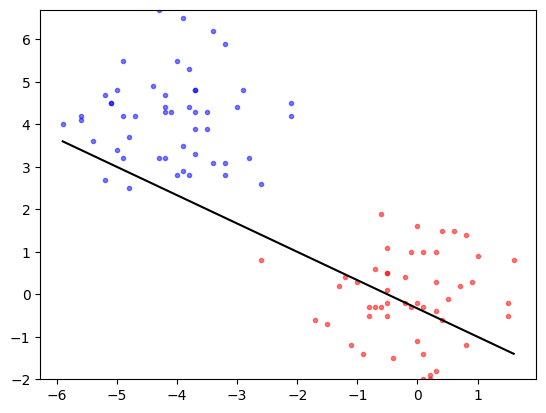

In [1]:
import matplotlib.pyplot as plt
import numpy as np
class_size = 50
np.random.seed(42)
# Generate data points
X1 = np.random.normal(0,1,(class_size,2)).round(1)
X2 = np.random.normal(0,1,(class_size,2)).round(1)+np.random.randint(-5,5, (1,2))
X_train = np.concatenate((X1, X2))

# Generate labels
y_train = np.concatenate((np.zeros(class_size),np.ones(class_size)))

#plot data points
def plot_data(X,y):
    # plt.scatter(X[:,0],X[:,1],c=y, alpha=0.6)
    plt.plot(X[:,0][y==0],X[:,1][y==0], 'r.',alpha=0.5)
    plt.plot(X[:,0][y==1],X[:,1][y==1], 'b.',alpha=0.5)

# plot (dummy) decision boundary
def plot_decision_boundary(X,w, a=1):
    x1 = np.linspace(min(X[:,0]),max(X[:,0]),10)
    m = -w[1]/w[2]
    c = -w[0]/w[2]
    x2 = m*x1+c
    plt.plot(x1,x2, c='k', alpha=a)
    plt.ylim(min(X[:,1]),max(X[:,1]))

# Dummy weights
w_dummy = [1,2,3]

plot_data(X_train,y_train)
plot_decision_boundary(X_train, w_dummy)


Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [ 1.   0.5 -0.1] z:  0.0 y_hat:  1.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [1.  0.6 1.5] z:  -0.115 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [ 1.  -0.2 -0.2] z:  -0.09200000000000001 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [1.  1.6 0.8] z:  -0.17200000000000001 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [ 1.  -0.5  0.5] z:  -0.07 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [ 1.  -0.5 -0.5] z:  -0.08000000000000002 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [ 1.   0.2 -1.9] z:  -0.129 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [ 1.  -1.7 -0.6] z:  -0.021000000000000005 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [ 1.  -1.   0.3] z:  -0.047 y_hat:  0.0 y:  0.0
Epoch: 0  Weights :  [[-0.1  -0.05  0.01]] x:  [ 1.  -0.9 -1.4] z:  -0.069 y_hat:  0.0 y:  0.0
Epo

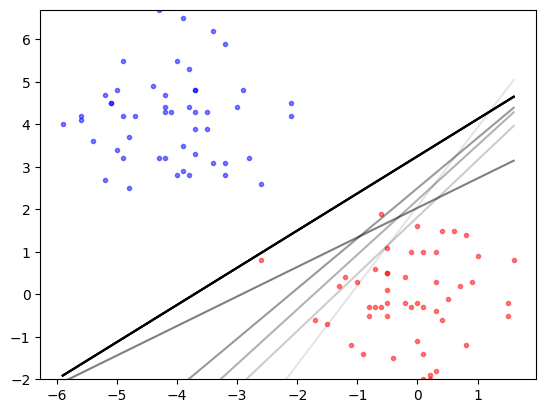

In [2]:
def step_function(z):
    return 1.0 if z>=0 else 0.0

def perceptron(data, labels, lr, e):
    """
    data: numpy array of shape (m,n)
    labels: numpy array of shape (m,1)
    lr: learning rate
    e: number of epochs
    """
    plot_data(data,labels)
    m,n = data.shape
    X = np.hstack([np.ones((m,1)),data])
    w = np.zeros((n+1,1))
    for i in range(e):
        for j in range(m):
            y = labels[j]
            x = X[j]
            z = np.dot(x,w)
            y_hat = step_function(z)
            w = w + np.dot(lr*(y-y_hat),x.reshape(-1,1))
            print("Epoch:", i," Weights : ", w.T,"x: ", x, "z: ", z[0], "y_hat: ", y_hat, "y: ", y)
        plot_decision_boundary(data, w, i/e)
    return w
w = perceptron(X_train, y_train, 0.1, 10)